In [32]:
%matplotlib inline

In [33]:
from IPython import display
import matplotlib.pylab as pl
import numpy as np
from IPython.display import clear_output

In [34]:
DOWNLEFT = 'DOWNLEFT'
DOWN = 'DOWN'
DOWNRIGHT = 'DOWNRIGHT'
LEFT = 'LEFT'
RIGHT = 'RIGHT'
UPLEFT = 'UPLEFT'
UP = 'UP'
UPRIGHT = 'UPRIGHT'
SEG_LEN = 20

In [35]:
def getDirection(coord_diff):
    x, y = coord_diff

    if x == 0 and y == 0:
        return None # two coordinates are the same.
    elif x == 0 and y > 0:
        return UP
    elif x == 0 and y < 0:
        return DOWN
    elif x < 0 and y == 0:
        return LEFT
    elif x > 0 and y == 0:
        return RIGHT

    slope = float(y) / float(x)  # тангенс угла наклона отрезка

    
    if x > 0 and y > 0: # верхний правый квадрант
        if slope < 0.4142:
            return RIGHT # slope = [0; 22.5]
        elif slope > 2.4142:
            return UP # slope = [67.5; 90]
        else:
            return UPRIGHT # slope = [22.5; 67.5]
    elif x > 0 and y < 0: # нижный правый квадрант
        if slope < -2.4142:
            return DOWN
        elif slope > -0.4142:
            return RIGHT
        else:
            return DOWNRIGHT
    elif x < 0 and y > 0: # верхний левый квадрант
        if slope > -0.4142:
            return LEFT
        elif slope < -2.4142:
            return UP
        else:
            return UPLEFT
    elif x < 0 and y < 0: # нижний левый квадрант
        if slope > 2.4142:
            return DOWN
        elif slope < 0.4142:
            return LEFT
        else:
            return DOWNLEFT

In [36]:
def getGesture(coords_diff):
    dirs = [getDirection(coord_diff) for coord_diff in coords_diff]
    dirs = [i for i in dirs if i != None] # убираем None

    seg_dirs = []
    for i in range (0, len (dirs)-SEG_LEN, SEG_LEN):
        spl = dirs[i : i+SEG_LEN]
        (vals, counts) = np.unique(spl, return_counts=True)
        ind = np.argmax(counts)
        seg_dirs.append(vals[ind]) # наиболее часто встречающееся направление в сегменте

    i = 0
    while (i < len(seg_dirs) - 1):        # убираем повторяющиеся
        if seg_dirs[i] == seg_dirs[i+1]:
            del seg_dirs[i+1]
            i -= 1
        i+=1
    
    return seg_dirs

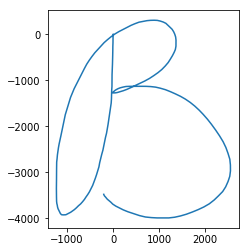

['DOWN', 'DOWNLEFT', 'UP', 'UPRIGHT', 'DOWNLEFT', 'RIGHT', 'DOWNLEFT', 'LEFT']


KeyboardInterrupt: 

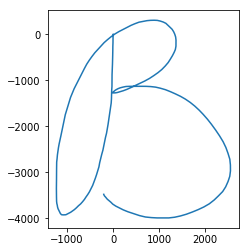

In [37]:
def getCoords(procfile):
    line = procfile.read()
    lines = line.splitlines()
        
    x = np.array([], dtype=np.int32)
    y = np.array([], dtype=np.int32)

    for l in lines:
        l = l.split('\t')
        x = np.append(x, int(l[0]))
        y = np.append(y, int(l[1]))
    return (x,y)

def recGesture(x_old, y_old):
    procfile = open('/proc/mouseGestModule/info', 'r')
    x, y = getCoords(procfile)
    if (x.size > 0):
        x_old = np.append(x_old, x)
        y_old = np.append(y_old, y)
    elif (len(x_old) > 1):
        
        g = getGesture(list(zip(x_old, -y_old)))
        x_old = x_old.cumsum() 
        y_old = -y_old.cumsum()

        try:
            pl.clf()
            display.clear_output(wait=True)
            pl.gca().set_aspect('equal', adjustable='box')
            pl.plot(x_old, y_old) 
            display.display(pl.gcf())
            print (g)
        except KeyboardInterrupt:
            return;
        
        x_old = np.array([0])
        y_old = np.array([0])
    
    procfile.close()
    s.enter(1, 1, recGesture, (x_old, y_old))

    
import sched, time
s = sched.scheduler(time.time, time.sleep)
    
x_old = np.array([0])
y_old = np.array([0])
    
s.enter(1, 1, recGesture, (x_old, y_old,))
s.run()